# MCP meas examples : data cocktail & viewer

* **author** : A. Dareau
* **date** : 2021-02-10

Let's illustrate how to use the data cocktail and viewer from the mcp_meas package

In [260]:
# -- global imports
import matplotlib.pyplot as plt
from pathlib import Path
import os 
import numpy as np
import pandas as pd

# -- local imports
from mcp_meas.classes import DataCocktail, MCPViewer
from mcp_meas.functions.fullboost import spherical_slicing as ss
from mcp_meas.functions.fullboost import spherical as fbs


## Load data (data cocktail)

First, we have to load the data. This is done with the DataCocktail class

In [278]:
# -- settings
#data_root = Path(".") / "examples/data_sample"
#data_set = "MOTT.pkl"

#data_root = os.path.join(
#    '/Users/david/Documents/Physique/Studenti/PostDoc/Dareau/calculs-correlations/MCP-Measurement-master/examples/data_sample','')
#data_set = "MOTT.pkl"

data_set = "Impurities-thermal-gas-22-07-2022.mat"
data_root = os.path.join('/Users/david/Desktop/Data-impurities-20-7-2022/','')

# -- load
cocktail = DataCocktail(data_root=data_root, data_set=data_set)
cocktail.verbose = False  # make it quiet
cocktail.load_data()  # load the data
cocktail.remove_empty_runs()  # remove empty runs
cocktail.display_data_info() 
data = cocktail.to_dict()

+ file loaded : /Users/david/Desktop/Data-impurities-20-7-2022/Impurities-thermal-gas-22-07-2022.mat
+ run number  : 1813
+ atom number : 6.41e+05
+ empty runs  : 0
+ atom / run  :
    > mean : 3.53e+02
    > max  : 4.19e+02
    > min  : 2.86e+02
    > std  : 2.32e+01


## MCP Viewer examples

First, we have to initialize a MCPViewer object, and feed it with the loaded data

In [280]:
viewer = MCPViewer(data=cocktail.copy_data())

We can generate 1D cuts easily

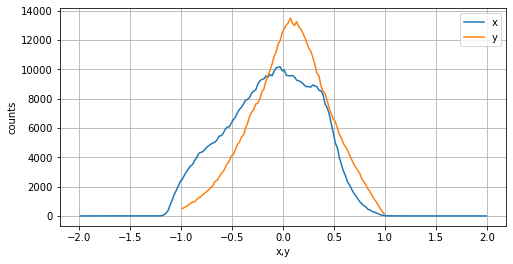

In [263]:
x, histx = viewer.generate_1D_hist(axis='x',
                                   kx_lim=(-2, 2),  # sets 'axial' selection
                                   ky_lim=(-2, 2),  # sets 'transverse' selection
                                   kz_lim=(-2, 2),  # sets 'transverse' selection
                                   bins=200)

y, histy = viewer.generate_1D_hist(axis='y',
                                   kx_lim=(-2, 2),  # sets 'transverse' selection
                                   ky_lim=(-1, 1),  # sets 'axial' selection
                                   kz_lim=(-2, 2),  # sets 'transverse' selection
                                   bins=100)

plt.figure(figsize=(8, 4))
plt.plot(x, histx, label='x')
plt.plot(y, histy, label='y')
plt.xlabel('x,y')
plt.ylabel('counts')
plt.grid()
plt.legend()
plt.show()

And also 2D histograms

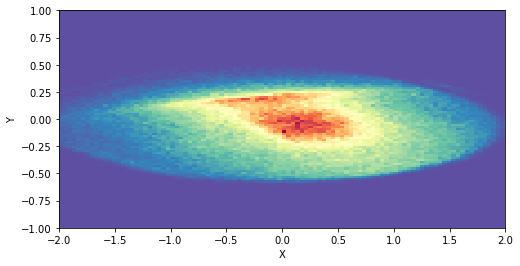

In [264]:
X, Y, Z = viewer.generate_2D_hist(axis='xy',
                                  kx_lim=(-2, 2),
                                  ky_lim=(-1, 1),  
                                  kz_lim=(-2, 2),  # sets 'transverse' selection
                                  bins=(100, 100))

plt.figure(figsize=(8, 4))
plt.pcolormesh(X, Y, Z, cmap='Spectral_r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

There are also automatic routines to plot the density

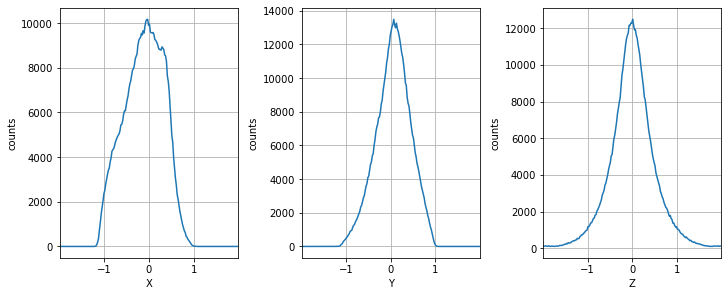

In [265]:
fig, ax = viewer.plot_1D()

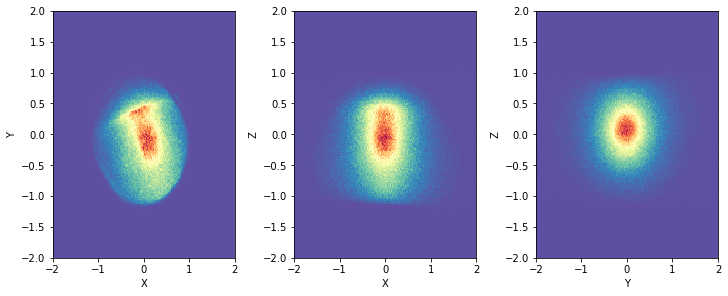

In [266]:
fig, ax = viewer.plot_2D()

options can be provided

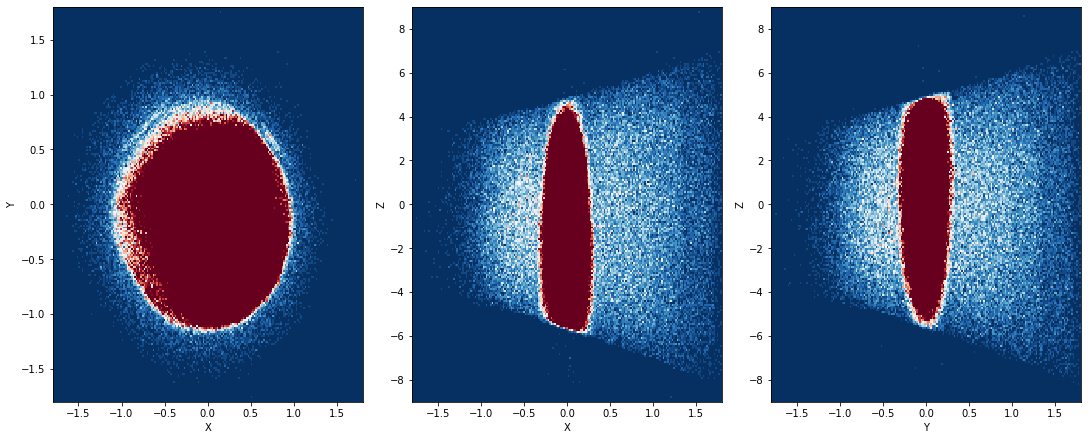

In [267]:
dk=1.8

hist2D_opts = dict(kx_lim=(-dk, dk),
                   ky_lim=(-dk, dk),
                   kz_lim=(-dk*5, dk*5),
                   bins=(200, 200))

colormesh_opts = dict(cmap='RdBu_r',
                      vmin=0,
                      vmax=20)

fig, ax = viewer.plot_2D(figsize=(15, 6),
                         colormesh_opts=colormesh_opts,
                         show=True,
                         **hist2D_opts)

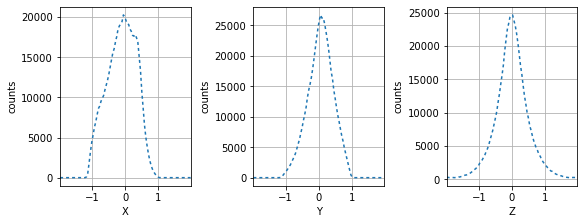

In [268]:
hist1D_opts = dict(kx_lim=(-2,2),
                   ky_lim=(-2, 2),
                   kz_lim=(-2, 2),
                   bins=100)

plot_opts = dict(dashes=[2,2])

fig, ax = viewer.plot_1D(figsize=(8, 3),
                         plot_opts=plot_opts,
                         show=True,
                         **hist1D_opts)

<ipython-input-347-d1cb0f66988f>:23: RuntimeWarning: divide by zero encountered in power
  plt.plot(x,5e-2*x**(-4))


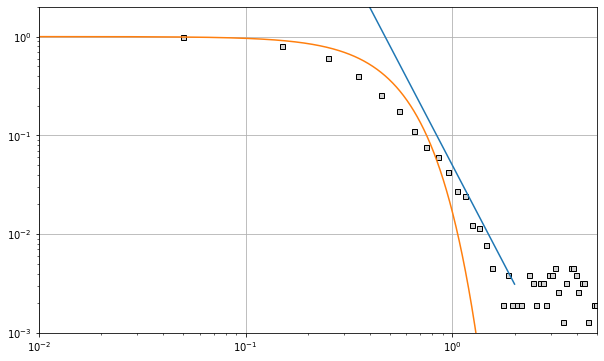

In [347]:
dk=.07#0.2

hist1D_opts = dict(kx_lim=(-dk,dk),
                   ky_lim=(-dk,dk),
                   kz_lim=(-5, 5),
                   bins=100)

U, Z = viewer.generate_1D_hist(axis="Z", **hist1D_opts)
Z=Z/np.max(Z)
hist = (U, Z)

fig,ax=plt.subplots(1,1,figsize=[10,6])
plt.loglog(U, Z,
           #color='red',label='No BEC'
           marker='s',markersize=5,linestyle='none',
           color=(0/255,79/255,0/255),
           markeredgecolor='black',
           markerfacecolor='lightgray',
           markeredgewidth=1.,lw=1,
           label='thermal gas')

x=np.linspace(0,2,1000)
plt.plot(x,5e-2*x**(-4))
plt.plot(x,np.exp(-x**2/2/0.35**2))
plt.ylim(1e-3,2)
plt.xlim(1e-2,5)
plt.grid()


In [466]:
data_set = "Impurities-thermal-gas-22-07-2022.mat"
data_root = os.path.join('/Users/david/Desktop/Data-impurities-20-7-2022/','')

# -- load data -- Data is formed of four columns: kx, ky, kz, run
cocktail = DataCocktail(data_root=data_root, data_set=data_set)
cocktail.verbose = False  # make it quiet
cocktail.load_data()  # load the data
cocktail.remove_empty_runs()  # remove empty runs
cocktail.display_data_info() 
data = cocktail.to_dict()

# - convert to spherical - each atom coordinates (kx, ky, kz) are written as (k,theta,phi)
kr, kth, kph = ss.cart2sph(data["kx"], data["ky"], data["kz"])

data_new=data.copy()
data_new['kr']=kr
data_new['kth']=kth
data_new['kph']=kph

# total number of atoms
Natom=len(data_new['kx'])
print('Number of atoms:', Natom)

# angle theta of the cone around Oz
theta_cone=9*np.pi/180
print('Angle theta of the cone:',theta_cone*180/np.pi,'°')

index=np.where(data_new['kth']<theta_cone)

#data_new['kx']=data_new['kx'][index]
#data_new["ky"]=data_new["ky"][index]
#data_new["kz"]=data_new["kz"][index]
#data_new["kr"]=data_new["kr"][index]
#data_new["kth"]=data_new["kth"][index]
#data_new["kph"]=data_new["kph"][index]

#data_cut=data.copy()
#data_cut['kx']=data_cut['kx'][index]
#data_cut['ky']=data_cut['ky'][index]
#data_cut['kz']=data_cut['kz'][index]
#data_cut['run']=data_cut['run'][index]



+ file loaded : /Users/david/Desktop/Data-impurities-20-7-2022/Impurities-thermal-gas-22-07-2022.mat
+ run number  : 1813
+ atom number : 6.41e+05
+ empty runs  : 0
+ atom / run  :
    > mean : 3.53e+02
    > max  : 4.19e+02
    > min  : 2.86e+02
    > std  : 2.32e+01
Number of atoms: 640703
Angle theta of the cone: 9.0 °


Histogramming: 100%|██████████| 60/60 [01:06<00:00,  1.12s/it]


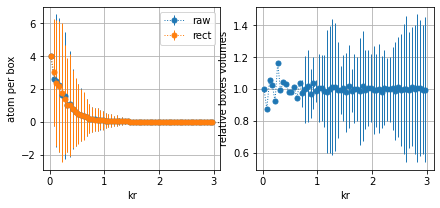

In [467]:
kr_new=np.absolute(kr[index])
kth_new=kth[index]
kph_new=kph[index]

res=fbs.slice_histogram(kr_new, kth_new, kph_new, run=None, start=0, stop=3, n_slice=60)

den=fbs.extract_radial_density(res, plot=True)


<ipython-input-475-ce4e706a2e67>:18: RuntimeWarning: divide by zero encountered in power
  plt.plot(x,2e-2*x**(-4),'-.')


array([4.        , 2.625     , 2.5       , 2.22222222, 1.63636364,
       1.58974359, 1.015625  , 1.08024691, 0.77142857, 0.57608696,
       0.47928994, 0.42091837, 0.32862903, 0.26704545, 0.1867284 ,
       0.15512465, 0.13625   , 0.12896406, 0.11414141, 0.09461806,
       0.072     , 0.06240929, 0.06948052, 0.05410226, 0.04777778,
       0.03069719, 0.03846154, 0.01843723, 0.01428571, 0.01041667,
       0.01157895, 0.00922761, 0.0059375 , 0.00475907, 0.00672269,
       0.00522466, 0.00587334, 0.00590737, 0.00611136, 0.00622852,
       0.00545455, 0.00634371, 0.0049926 , 0.00449983, 0.006456  ,
       0.0045045 , 0.00600185, 0.00624257, 0.00518207, 0.00550964,
       0.00598335, 0.00403124, 0.00581395, 0.00451076, 0.00421508,
       0.00627163, 0.00619618, 0.00455927, 0.00592463, 0.00544192])

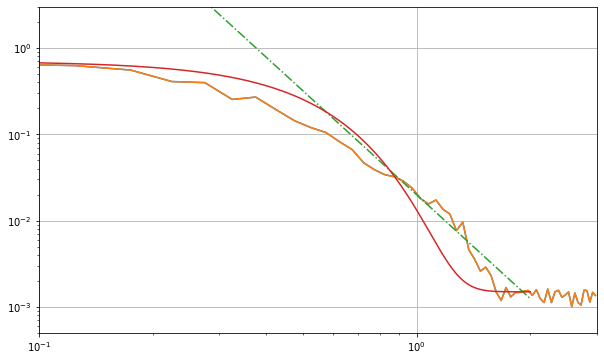

In [475]:
h = res["h"][0]
h_list = res["h"]
# get n_mean & n_std slice by slice
n_mean_9b = np.array([np.mean(h) for h in h_list])
# get slices radial centers
rc_9b = res["rc"]

fig,ax=plt.subplots(1,1,figsize=[10,6])
#plt.loglog(rc_3, n_mean_3/np.max(n_mean_3))
#plt.loglog(rc_6, n_mean_6/np.max(n_mean_6))
plt.loglog(rc_9, n_mean_9/np.max(n_mean_9))
plt.loglog(rc_9b, n_mean_9b/np.max(n_mean_9b))
#plt.loglog(rc_12, n_mean_12/np.max(n_mean_12))
#plt.loglog(rc_25, n_mean_25/np.max(n_mean_25))


x=np.linspace(0,2,1000)
plt.plot(x,2e-2*x**(-4),'-.')
plt.plot(x,0.7*np.exp(-x**2/2/0.35**2)+1.5e-3,'-')
plt.grid()
plt.xlim(1e-1,3)
plt.ylim(5e-4,3)

n_mean_9

## Data Cocktail examples

First, we load the data

In [20]:
# -- settings
data_root = Path(".") / "examples/data_sample"
data_set = "kmk.pkl"

# -- load
cocktail = DataCocktail(data_root=data_root, data_set=data_set)
cocktail.verbose = False  # make it quiet
cocktail.load_data()  # load the data
cocktail.remove_empty_runs()  # remove empty runs

# -- view and display info
viewer = MCPViewer(data=cocktail.copy_data())
viewer.plot_2D()
cocktail.display_data_info()

Error loading examples/data_sample/kmk.pkl : file does not exist


TypeError: 'builtin_function_or_method' object is not iterable

It is possible to shuffle the atoms (run per run)

In [14]:
# -- suffle
cocktail.verbose = True
cocktail.shuffle()

> shuffle atoms (run per run)


0it [00:00, ?it/s]


TypeError: 'builtin_function_or_method' object is not iterable

We can fold to the first brillouin zone

In [15]:
# -- fold
cocktail.fold_brillouin()

# -- plot
viewer.set_data(cocktail.copy_data())
viewer.plot_2D()

# -- display info
cocktail.display_data_info()

> fold to first brillouin zone


0it [00:00, ?it/s]


TypeError: 'builtin_function_or_method' object is not iterable

We can also filter the atoms

In [ ]:
# -- reload data
cocktail.load_data()

# -- filter
cocktail.filter_momentum(type='box', k_min=0.15, k_max=0.85)

# -- plot
viewer.set_data(cocktail.copy_data())
_ = viewer.plot_2D()

+ file loaded : data_sample/kmk.pkl
+ run number  : 4034
+ atom number : 2.31e+06
+ empty runs  : 1708
+ atom / run  :
    > mean : 9.95e+02
    > max  : 1.28e+03
    > min  : 6.93e+02
    > std  : 1.59e+02
> filter momentum


 91%|█████████▏| 3682/4034 [00:05<00:00, 613.40it/s]

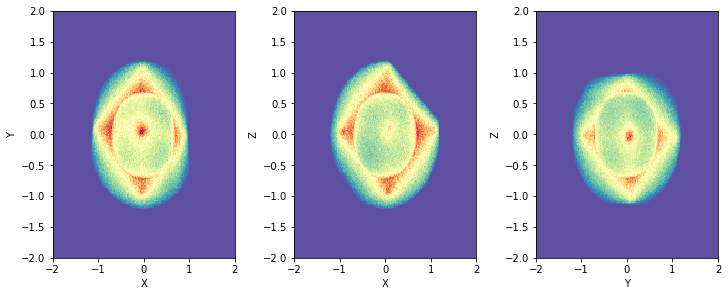

In [16]:
# -- reload data
cocktail.verbose = False
cocktail.load_data()

# -- filter
cocktail.filter_momentum(type='sphere', k_min=0.7, k_max=1.2)

# -- plot
viewer.set_data(cocktail.copy_data())
_ = viewer.plot_2D()

We can combine all data in one set

In [17]:
# -- reload data
cocktail.verbose = True
cocktail.load_data()

# -- recombine
cocktail.recombine(n_runs=1)  # recombine in ONE run
cocktail.display_data_info()

# -- keep a copy of data
data_all = cocktail.copy_data()  # as a panda frame
data_all = cocktail.to_numpy()  # as a numpy array
data_all = cocktail.to_list()  # as a list

# -- or even save it
cocktail.save_data('data_all.pkl',
                  root=None,  # default = same as input data,
                  format='pickle')

+ file loaded : data_sample/data_maker.pkl
+ run number  : 1327
+ atom number : 2.77e+06
+ empty runs  : 0
+ atom / run  :
    > mean : 2.09e+03
    > max  : 2.69e+03
    > min  : 1.45e+03
    > std  : 3.34e+02
> recombine atoms
    > runs in  : 1327
    > runs out : 1
 + gather all


100%|██████████| 1327/1327 [00:00<00:00, 13707.45it/s]


 + split
 + load into dataframe


100%|██████████| 1/1 [00:00<00:00, 291.80it/s]


FINISHED in 1.01 s 


100%|██████████| 1/1 [00:00<00:00, 17.88it/s]

+ file loaded : data_sample/data_maker.pkl
+ run number  : 1
+ atom number : 2.77e+06
+ empty runs  : 0
+ atom / run  :
    > mean : 2.77e+06
    > max  : 2.77e+06
    > min  : 2.77e+06
    > std  : 0.00e+00
> saved as data_sample/data_all.pkl


Or prepare a set of virtual non-correlated runs

In [18]:
# -- reload data
cocktail.verbose = True
cocktail.load_data()

# -- recombine in one
cocktail.recombine(n_runs=1)  # recombine in ONE run

# -- shuffle the single run
cocktail.shuffle()

# -- recombine in 500 runs
cocktail.recombine(500)

# -- save
cocktail.save_data('data_random.hdf5',
                  root=None,  # default = same as input data,
                  format='hdf')

+ file loaded : data_sample/data_maker.pkl
+ run number  : 1327
+ atom number : 2.77e+06
+ empty runs  : 0
+ atom / run  :
    > mean : 2.09e+03
    > max  : 2.69e+03
    > min  : 1.45e+03
    > std  : 3.34e+02
> recombine atoms
    > runs in  : 1327
    > runs out : 1
 + gather all


100%|██████████| 1327/1327 [00:00<00:00, 7979.52it/s]


 + split
 + load into dataframe


100%|██████████| 1/1 [00:00<00:00, 280.63it/s]


FINISHED in 1.09 s 


100%|██████████| 1/1 [00:02<00:00,  2.94s/it]


> shuffle atoms (run per run)
FINISHED in 2.94 s 
> recombine atoms
    > runs in  : 1
    > runs out : 500
 + gather all


100%|██████████| 1/1 [00:00<00:00, 649.47it/s]


 + split
 + load into dataframe


100%|██████████| 500/500 [00:00<00:00, 3867.84it/s]


FINISHED in 1.04 s 


/home/alex/anaconda3/envs/boost-histogram/lib/python3.8/site-packages/pandas/core/generic.py:2603: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['kx', 'ky', 'kz'], dtype='object')]

  pytables.to_hdf(


> saved as data_sample/data_random.hdf5
